In [127]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

$ \frac{\partial T}{\partial t} + u\frac{\partial T}{\partial x} + v \frac{\partial T}{\partial y} = D \frac{\partial^2 T}{\partial y^2} $

$ T|_{t=0} = C$

$ T|_{y=0} = D$

$ T|_{x=\pm A} = 0$

$ \frac{\partial T}{\partial y}|_{y=B} = 0$

$ x \in [-A, A]$

$ y \in [0, B] $

In [137]:
A = 10
B = 10
C = 5
D = 10
dx = 0.1
dt = 0.1
T_end = 10

In [138]:
def init(A, B, C, D, dx, dt):
    Nt = int(T_end / dt)
    Nx = int(2 * A / dx)
    Ny = int(B / dx)
    T0 = np.zeros((Ny, Nx))
    T0.fill(C)
    T0[0,:] = D
    T0[:,0] = 0
    T0[:,-1] = 0
    T1 = T0.copy()
    return T1, T0

T1, T0 = init(A, B, C, D, dx, dt)

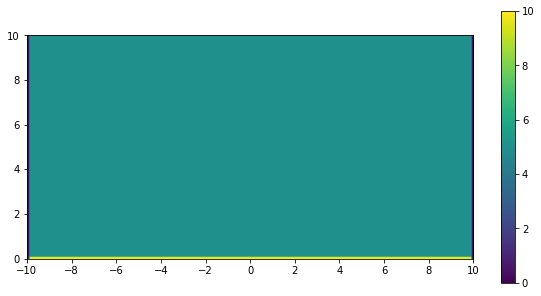

In [139]:
ticks = np.linspace(-A,A,11)
extent=(-A,A,0,B)

plt.figure(figsize=(10,5))
plt.imshow(T0, extent=extent, origin='lower')
plt.xticks(ticks);
plt.colorbar();

$\hat T_{i,j} = T_{i,j} + dt * (-u_{i,j} * \frac{T_{i,j+1} - T_{i,j-1}}{2 dx} - v_{i,j} \frac{T_{i,j} - T_{i-1,j}}{dx} + D * \frac{T_{i+1,j} - 2 * T_{i,j} + T_{i-1,j}}{dx^2})$

1) производная по x - краевая, левый край минус правый
2) производная по y - правая, текущий слой минус предыдущий
3) вторая производная по y - классическая

In [168]:
def u(x,y,t):
    return 1

def v(x,y,t):
    return 1

D_diffusion=1

def diffstep(T1, T, t, dt, dx, D):
    y,x=T.shape
    for i in range(1,y-1):
        for j in range(1,x-1):
            T1[i, j] = T[i,j] + dt * (-u(j*dx, i*dx, t) * (T[i, j+1] - T[i,j-1]) / (2*dx) + \
                                      -v(j*dx, i*dx, t) * (T[i, j] - T[i-1,j]) / (dx) + \
                                      3 * (T[i+1,j] - 2*T[i,j] + T[i-1, j]) / (dx ** 2)
                                     )
    T1[-1,:] = T1[-2,:]

In [169]:
dt=0.001
T1, T0 = init(A, B, C, D, dx, dt)
plot = False

for i in range(100):
    if plot:
        clear_output(wait=True)
        plt.figure(figsize=(9,6))
        plt.plot(T0[:,5])
        plt.title(fr'График функции в момент времени t = {i} * $\Delta\tau$')
        plt.show()
        sleep(2)
    
    diffstep(T1, T0, i*dt, dt, dx, D)
    T0 = T1.copy()

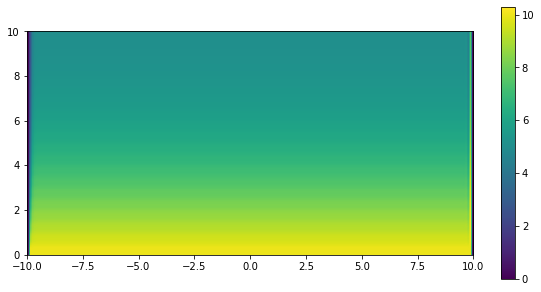

In [170]:
#ticks = np.linspace(-A,A,11)
#extent=(-A,A,0,B)

plt.figure(figsize=(10,5))
plt.imshow(T0[:20], extent=extent, origin='lower')
#plt.xticks(ticks);
plt.colorbar()

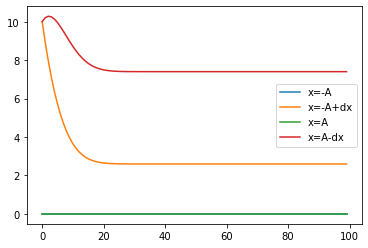

In [171]:
plt.plot(T0[:,0], label='x=-A')
plt.plot(T0[:,1], label='x=-A+dx')

plt.plot(T0[:,-1], label='x=A')
plt.plot(T0[:,-2], label='x=A-dx')
plt.legend()

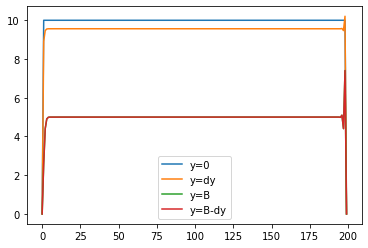

In [172]:
plt.plot(T0[0,:], label='y=0')
plt.plot(T0[1,:], label='y=dy')
plt.plot(T0[-1,:], label='y=B')
plt.plot(T0[-2,:], label='y=B-dy')
plt.legend()